In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.text as text
import matplotlib.transforms as transforms
import matplotlib.collections as collections
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib as mpl
import sys
import os
import argparse
import pandas as pd
import seaborn as sns
from IPython.display import HTML

### Q1- Statistical Deception

In [2]:
import pandas as pd

file_path = '2024_Assignment1_BRSM.xlsx'
df = pd.read_excel(file_path)
print(df)
sheet_name = 'Statistical Deception'
df = pd.read_excel(file_path, sheet_name=sheet_name)

           x1         x2         x3         x4
0    1.000000   1.000000   1.000000   1.000000
1    2.022197   7.103307   1.261219   7.403307
2    2.681359   7.161498   1.522437   7.403307
3    3.180360   7.192361   1.783656   7.403307
4    3.587617   7.214504   2.044874   7.403307
..        ...        ...        ...        ...
95  16.412383  12.785496  11.163442  17.932782
96  16.819640  12.807639  10.902223  18.199587
97  17.318641  12.838502  10.641005  18.466391
98  17.977803  12.896693  10.379786  18.733196
99  19.000000  19.000000  10.118567  19.000000

[100 rows x 4 columns]


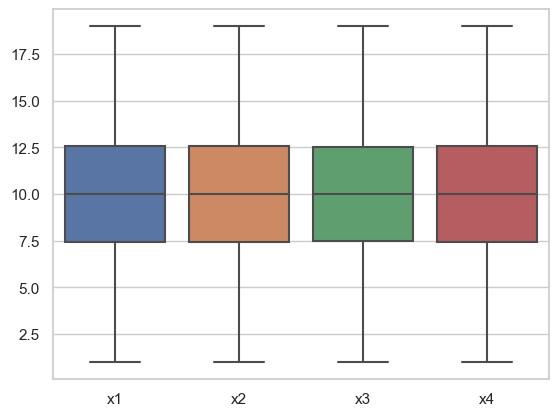

In [3]:
# Create a box plot using seaborn
sns.set(style="whitegrid") 

# If your DataFrame is already in the correct format, you can directly use boxplot
sns.boxplot(data=df)

# Show the plot
plt.show()


#### We observe the median and the interquartile percentile for the columns is the same

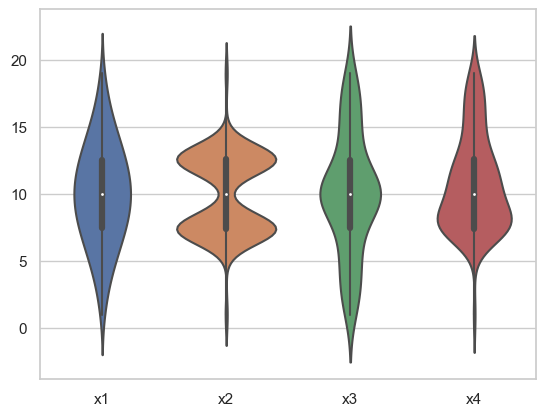

In [4]:
# Create a violin plot using seaborn
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# If your DataFrame is already in the correct format, you can directly use violinplot
sns.violinplot(data=df)
# Show the plot
plt.show()


##### As we can see, the box plot was misleading in this case as the statiscal inference from the data was same however , after plotting the violin plot we get to know that the distribution of data is highly varied across the columns 

<AxesSubplot:ylabel='Frequency'>

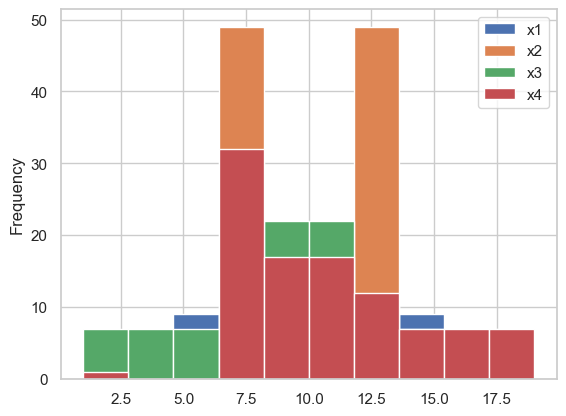

In [5]:
df.plot(kind = "hist")

##### Histogram clearly distingues all four

### Q2- Personality and Motion

##### Getting the data

In [6]:
file_path = '2024_Assignment1_BRSM.xlsx'
movement_df= pd.read_excel(file_path)
sheet_name = 'Movement Personality Results'
movement_df = pd.read_excel(file_path, sheet_name=sheet_name)
print(movement_df)

   Movements  Openness  Conscientiousness  Extraversion  Agreeableness  \
0   Root      0.139050           0.000000      0.325481       0.147281   
1   Hips      0.530089           0.477398      0.804277       0.547530   
2   Knee      0.869004           1.000000      0.662191       0.936127   
3   Ankle     0.964990           0.723205      0.638736       1.000000   
4   Toe       0.982430           0.590160      0.851289       0.893272   
5   Torso     0.551036           0.372635      0.489920       0.638199   
6   Neck      0.000000           0.057604      0.000000       0.000000   
7   Head      0.837630           0.502632      0.839598       0.555689   
8   Shoulder  0.318785           0.540544      0.844912       0.418395   
9   Elbow     0.861450           0.613711      1.000000       0.941450   
10  Wrist     0.505890           0.404177      0.477072       0.267725   
11  Finger    1.000000           0.708020      0.825508       0.573568   

    Neuroticism  
0      0.169475  
1

In [7]:
joints_imp = movement_df.set_index(keys="Movements").transpose()
joints_imp.reset_index(inplace=True)
joints_imp

Movements              index  Root      Hips      Knee      Ankle     \
0                   Openness  0.139050  0.530089  0.869004  0.964990   
1          Conscientiousness  0.000000  0.477398  1.000000  0.723205   
2               Extraversion  0.325481  0.804277  0.662191  0.638736   
3              Agreeableness  0.147281  0.547530  0.936127  1.000000   
4                Neuroticism  0.169475  0.686413  1.000000  0.735433   

Movements  Toe       Torso     Neck      Head      Shoulder  Elbow     \
0          0.982430  0.551036  0.000000  0.837630  0.318785  0.861450   
1          0.590160  0.372635  0.057604  0.502632  0.540544  0.613711   
2          0.851289  0.489920  0.000000  0.839598  0.844912  1.000000   
3          0.893272  0.638199  0.000000  0.555689  0.418395  0.941450   
4          0.970389  0.611516  0.000000  0.797577  0.347727  0.902488   

Movements  Wrist     Finger    
0          0.505890  1.000000  
1          0.404177  0.708020  
2          0.477072  0.825508  
3          0.267725  0.573568  
4          0.626525  0.757162

In [8]:
joints_imp.rename(columns = {'index':'personality'}, inplace = True)
joints_imp.columns = joints_imp.columns.str.strip()

In [9]:
joints_imp.columns

Index(['personality', 'Root', 'Hips', 'Knee', 'Ankle', 'Toe', 'Torso', 'Neck',
       'Head', 'Shoulder', 'Elbow', 'Wrist', 'Finger'],
      dtype='object', name='Movements')

#### Bad Way 

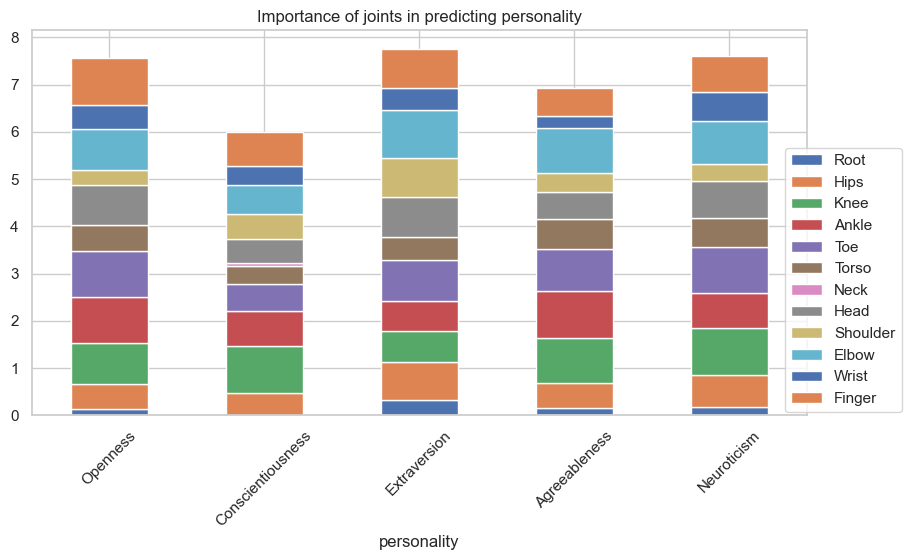

In [10]:
fig,ax = plt.subplots(1)
joints_imp.plot(ax=ax,x='personality', kind='bar',stacked=True,figsize=(10,5),title="Importance of joints in predicting personality")
ax.get_legend().remove()
plt.xticks(rotation = 45)
fig.legend(loc=5)


## Good way

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

In [12]:
categories = movement_df.Movements

In [13]:
fig = go.Figure()

for col in movement_df.columns[1:]:

  fig.add_trace(go.Scatterpolar(
        r=movement_df[col],
        theta=categories,
        fill='toself',
        name=col
  ))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    ))
  , title="Importance of joints in predicting Personality"
)

fig.show()

In [24]:
categories = movement_df.Movements


n_r = 3
n_c = 2
fig = make_subplots(
    rows=n_r, 
    cols=n_c, 
    specs=[[{'type': 'polar'}] * n_c] * n_r
)



for i,col in enumerate(movement_df.columns[1:]):
    r= (i // n_c) + 1 
    c = (i % n_c) + 1
    fig.add_trace(go.Scatterpolar(
        r=movement_df[col],
        theta=categories,
        fill='toself',
        name=col
  ),row=r,col=c)

fig.update_layout(height=500, width=700, title="Importance of joints in predicting personality")

fig.show()

## Justification

We visualized the same data in two ways
    - stacked bar graph
    - spider graph/radar graph

Stacked bar graph is bad because it's hard to see the importance of various joints in predicting each personality type. In addition to this, it's hard to keep distinguish soo many labels by colors. Spider plot solves both the problems


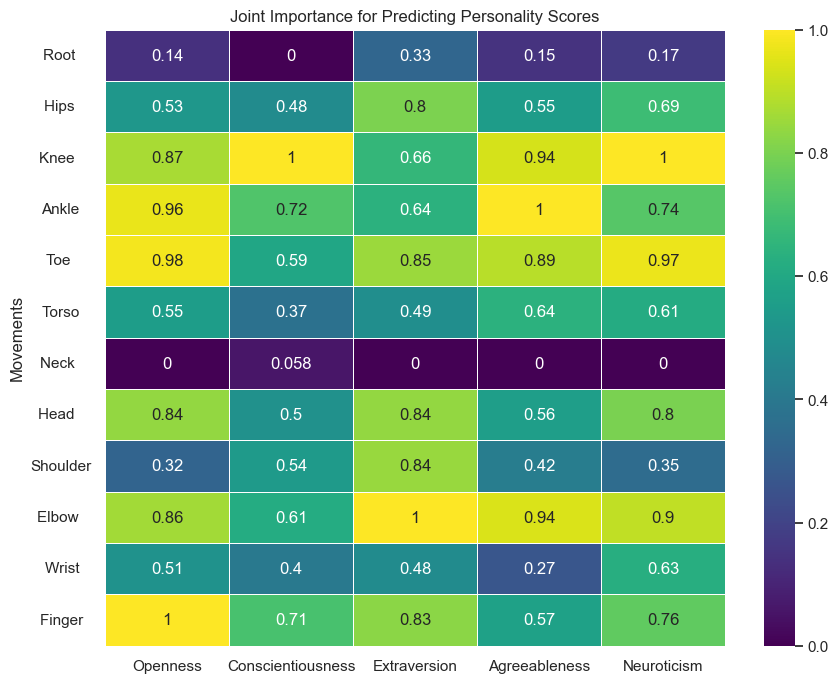

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named movement_df
plt.figure(figsize=(10, 8))
sns.heatmap(movement_df.set_index('Movements'), cmap='viridis', annot=True, linewidths=.5)
plt.title('Joint Importance for Predicting Personality Scores')
plt.show()


Heatmap is also a good way to represent the data

#### Radar chart is superior to represent this data as 
#### Comparison Across Joints: Radar charts enable direct comparisons of joint importance across all personality traits.
#### Visualising Patterns: Patterns in the value of each personality feature can be clearly observed.

### Q3 Data Plotting Adventure

#### For this we have been given four locations:-
1.Safe Zone
2.Isolated Island
3.Contaminated City
4.Rural Area
And we have been given gender-wise distribution of how many survived and how many turned to zombies.
We are required to analyse where survival chances are highest and what the common outcomes are in each location.

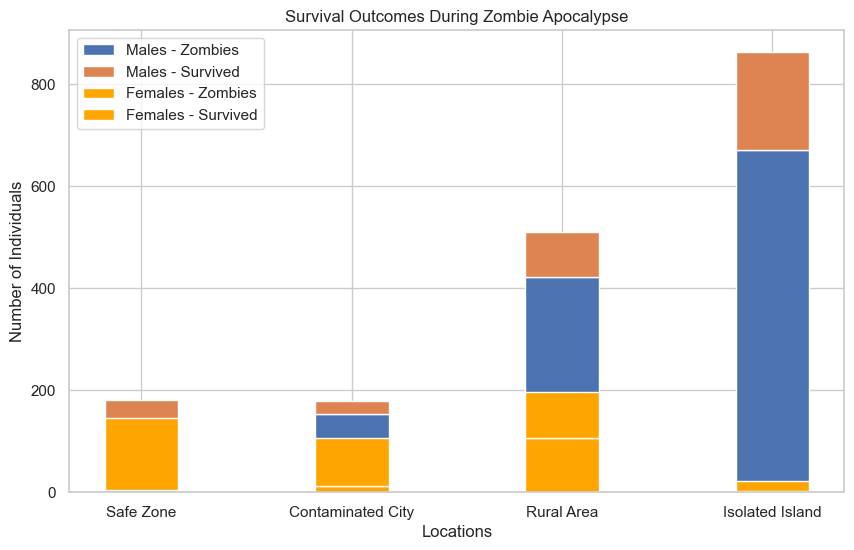

In [16]:
import matplotlib.pyplot as plt

# Given data
data = {
    'Safe Zone': {'Males': {'Zombies': 118, 'Survived': 62}, 'Females': {'Zombies': 4, 'Survived': 141}},
    'Contaminated City': {'Males': {'Zombies': 154, 'Survived': 25}, 'Females': {'Zombies': 13, 'Survived': 93}},
    'Rural Area': {'Males': {'Zombies': 422, 'Survived': 88}, 'Females': {'Zombies': 106, 'Survived': 90}},
    'Isolated Island': {'Males': {'Zombies': 670, 'Survived': 192}, 'Females': {'Zombies': 3, 'Survived': 20}}
}

locations = list(data.keys())
male_zombies = [data[loc]['Males']['Zombies'] for loc in locations]
male_survived = [data[loc]['Males']['Survived'] for loc in locations]
female_zombies = [data[loc]['Females']['Zombies'] for loc in locations]
female_survived = [data[loc]['Females']['Survived'] for loc in locations]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions = range(len(locations))

p1 = plt.bar(bar_positions, male_zombies, bar_width, label='Males - Zombies')
p2 = plt.bar(bar_positions, male_survived, bar_width, bottom=male_zombies, label='Males - Survived')
p3 = plt.bar(bar_positions, female_zombies, bar_width, label='Females - Zombies', color='orange')
p4 = plt.bar(bar_positions, female_survived, bar_width, bottom=female_zombies, label='Females - Survived', color='orange')

plt.xlabel('Locations')
plt.ylabel('Number of Individuals')
plt.title('Survival Outcomes During Zombie Apocalypse')
plt.xticks(bar_positions, locations)
plt.legend()

plt.show()


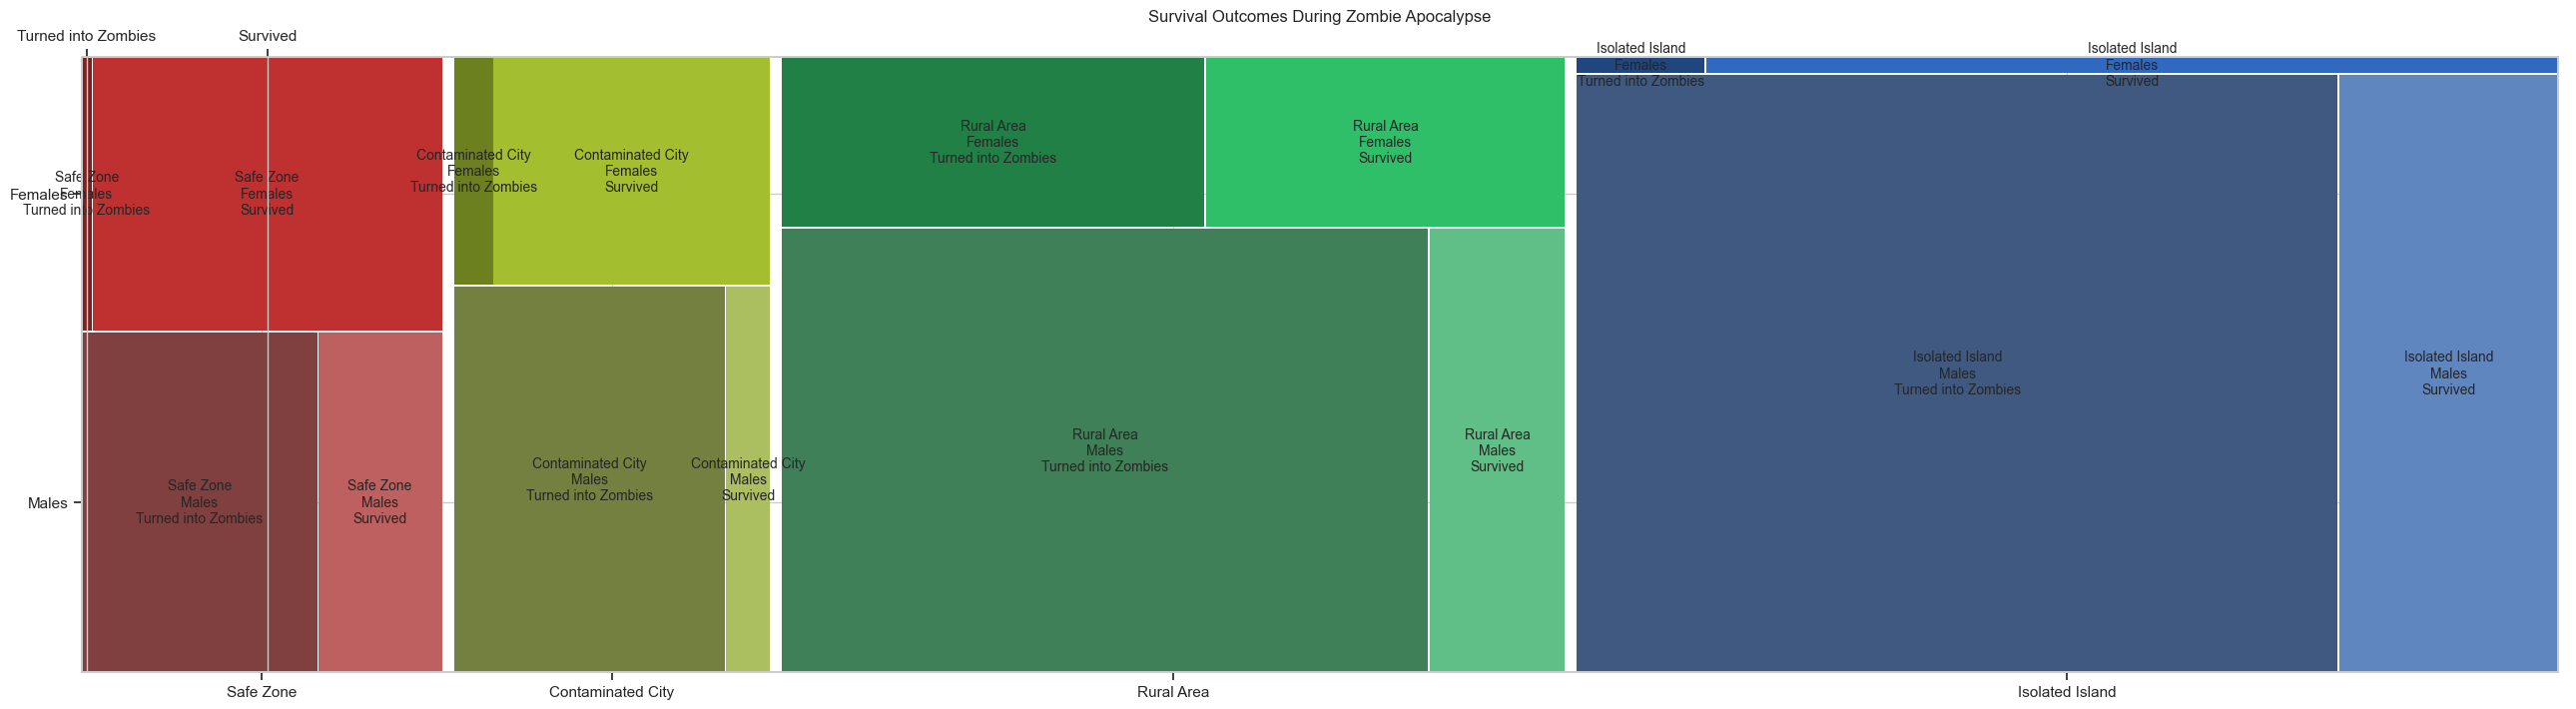

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Given data
data = {
    ('Safe Zone', 'Males', 'Turned into Zombies'): 118,
    ('Safe Zone', 'Males', 'Survived'): 62,
    ('Safe Zone', 'Females', 'Turned into Zombies'): 4,
    ('Safe Zone', 'Females', 'Survived'): 141,
    ('Contaminated City', 'Males', 'Turned into Zombies'): 154,
    ('Contaminated City', 'Males', 'Survived'): 25,
    ('Contaminated City', 'Females', 'Turned into Zombies'): 13,
    ('Contaminated City', 'Females', 'Survived'): 93,
    ('Rural Area', 'Males', 'Turned into Zombies'): 422,
    ('Rural Area', 'Males', 'Survived'): 88,
    ('Rural Area', 'Females', 'Turned into Zombies'): 106,
    ('Rural Area', 'Females', 'Survived'): 90,
    ('Isolated Island', 'Males', 'Turned into Zombies'): 670,
    ('Isolated Island', 'Males', 'Survived'): 192,
    ('Isolated Island', 'Females', 'Turned into Zombies'): 3,
    ('Isolated Island', 'Females', 'Survived'): 20,
}

# Create mosaic plot
fig, ax = plt.subplots(figsize=(32, 8))
mosaic(data, title='Survival Outcomes During Zombie Apocalypse',ax=ax)
plt.show()


### Reason behind plot choice 

We can see the amount of data present in the various categories as proportional to the area covered in the plot

### Inferences 

- In each location, more males turned into zombies than survived
- In each location, more females survived than turned into zombies.
- In each location, there are more males than females

#### 3.2 Subtask 2 : Glass Glimpse

In [18]:
file_path = '2024_Assignment1_BRSM.xlsx'
dataframe = pd.read_excel(file_path)
# Specify the sheet name
sheet_name = 'Glass Glimpse'
dataframe = pd.read_excel(file_path, sheet_name=sheet_name)
print(dataframe)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


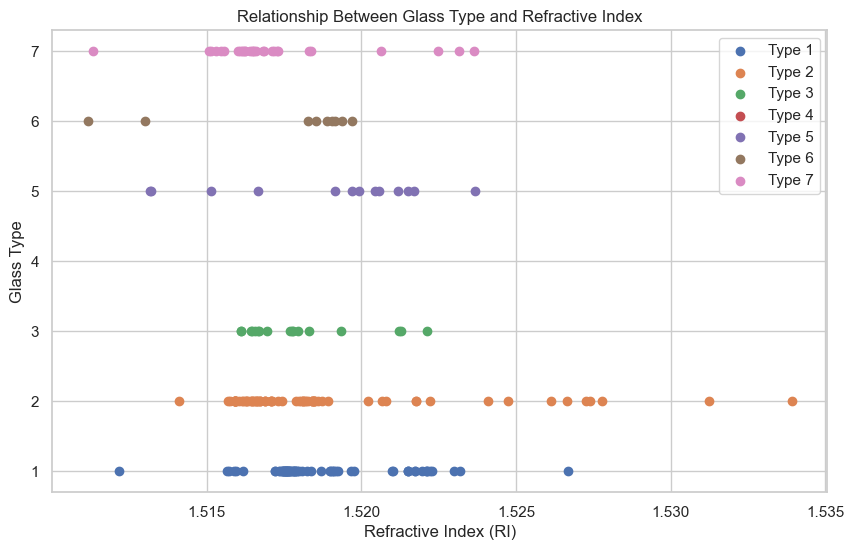

In [19]:
# Scatter plot
plt.figure(figsize=(10, 6))
for glass_type in range(1, 8):
    subset = dataframe[dataframe['Type'] == glass_type]
    plt.scatter(subset['RI'], subset['Type'], label=f'Type {glass_type}')

plt.title('Relationship Between Glass Type and Refractive Index')
plt.xlabel('Refractive Index (RI)')
plt.ylabel('Glass Type')
plt.legend()
plt.show()

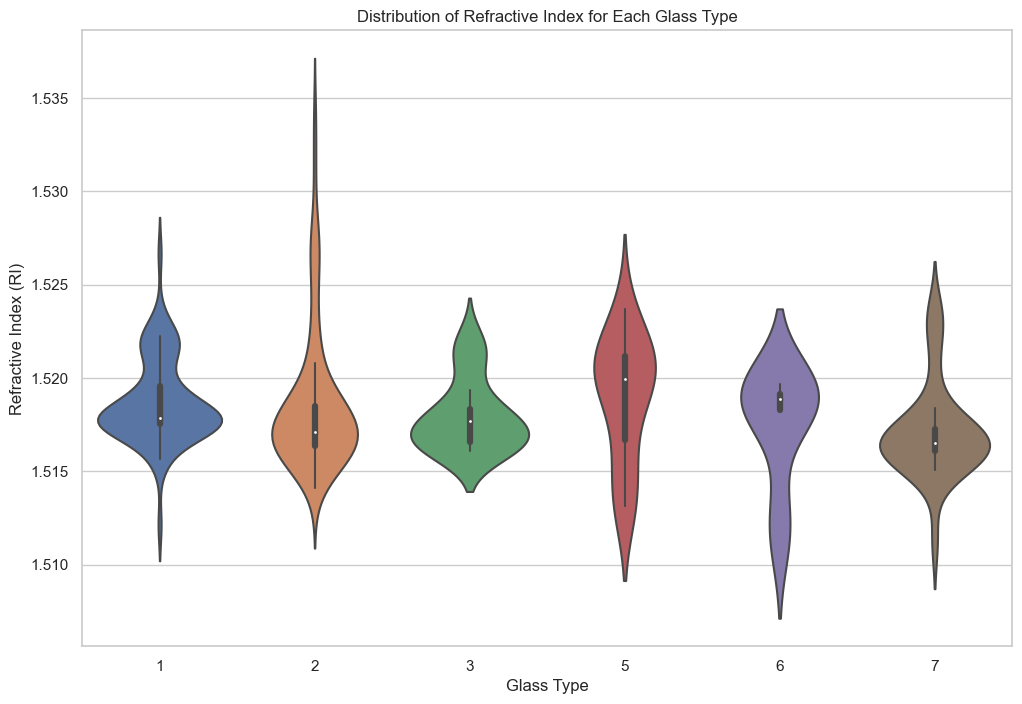

In [30]:
# Box plot or Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type', y='RI', data=dataframe)
plt.title('Distribution of Refractive Index for Each Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index (RI)')
plt.show()


Justification for plot :
Violin plot gives us the distribution of data 

#### Subtask-3 : Night at the Museum

In [33]:
excel_file = '2024_Assignment1_BRSM.xlsx'

df = pd.read_excel('2024_Assignment1_BRSM.xlsx', sheet_name='Museum Visitor')

sorted_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# months are of form "Jan 2013", "Feb 2013", etc. make a Dataframe with the months and years in different columns from df column 0
new_df = pd.DataFrame(df.iloc[:, 0].str.split(' ').tolist(), columns=['Month', 'Year'])
# add a column to the new dataframe with the number of visitors in museum 1
new_df['America_Tropical_Interpretive_Center'] = df.iloc[:, 1].values
new_df['Avila_Adobe'] = df.iloc[:, 2].values
new_df['Chinese_American_Museum'] = df.iloc[:, 3].values
new_df['Gateway_to_Nature_Center'] = df.iloc[:, 4].values
new_df['Firehouse_Museum'] = df.iloc[:, 5].values

# now sort the new dataframe first by year, then by month using the sorted_months list
new_df['Month'] = pd.Categorical(new_df['Month'], categories=sorted_months, ordered=True)
new_df = new_df.sort_values(['Year', 'Month'])

# now combine the month and year columns into one column
new_df['Month'] = new_df['Month'].astype(str)
new_df['Year'] = new_df['Year'].astype(str)
new_df['Month/Year'] = new_df['Month'] + ' ' + new_df['Year']
new_df = new_df.drop(['Month', 'Year'], axis=1)

df = new_df

# extract columns 1, 2, 3, 4
America_Tropical_Interpretive_Center = df.iloc[:, 0].values
Avila_Adobe = df.iloc[:, 1].values
Chinese_American_Museum = df.iloc[:, 2].values
Gateway_to_Nature_Center = df.iloc[:, 3].values
Firehouse_Museum = df.iloc[:, 4].values

dates = df.iloc[:, -1].values

In [34]:
import plotly.graph_objects as go

# Create traces for each museum
trace1 = go.Scatter(x=dates, y=America_Tropical_Interpretive_Center, mode='lines', name='America Tropical Interpretive Center')
trace2 = go.Scatter(x=dates, y=Avila_Adobe, mode='lines', name='Avila Adobe')
trace3 = go.Scatter(x=dates, y=Chinese_American_Museum, mode='lines', name='Chinese American Museum')
trace4 = go.Scatter(x=dates, y=Gateway_to_Nature_Center, mode='lines', name='Gateway to Nature Center')
trace5 = go.Scatter(x=dates, y=Firehouse_Museum, mode='lines', name='Firehouse Museum')

# Create layout
layout = go.Layout(title='Monthly Visitors to Museums',
                   xaxis=dict(title='Month/Year'),
                   yaxis=dict(title='Number of Visitors'))

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

# Show the plot
fig.show()


#### Task-4 : Fast and Furious: Heatmap

In [26]:
file_path = '2024_Assignment1_BRSM.xlsx'
fandf_df = pd.read_excel(file_path)
# Specify the sheet name
sheet_name = 'Fast and Furious'
fandf_df = pd.read_excel(file_path, sheet_name=sheet_name)
print(fandf_df)

      mpg   cylinders  cubicinches   hp  weightlbs  time-to-60   year  \
0    14.0           8          350  165       4209          12   1972   
1    31.9           4           89   71       1925          14   1980   
2    17.0           8          302  140       3449          11   1971   
3    15.0           8          400  150       3761          10   1971   
4    30.5           4           98   63       2051          17   1978   
..    ...         ...          ...  ...        ...         ...    ...   
256  17.0           8          305  130       3840          15   1980   
257  36.1           4           91   60       1800          16   1979   
258  22.0           6          232  112       2835          15   1983   
259  18.0           6          232  100       3288          16   1972   
260  22.0           6          250  105       3353          15   1977   

        brand  
0         US.  
1     Europe.  
2         US.  
3         US.  
4         US.  
..        ...  
256       U

In [27]:
missing_values = fandf_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
time-to-60      0
 year           0
 brand          0
dtype: int64


In [ ]:
# Remove extra spaces from column names
fandf_df.columns = fandf_df.columns.str.strip()

# Assuming 'brand' column is present, check the column names first
print(fandf_df.columns)
print(fandf_df['brand'])


Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')
0           US.
1       Europe.
2           US.
3           US.
4           US.
         ...   
256         US.
257      Japan.
258         US.
259         US.
260         US.
Name: brand, Length: 261, dtype: object


In [28]:
fandf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5   time-to-60    261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


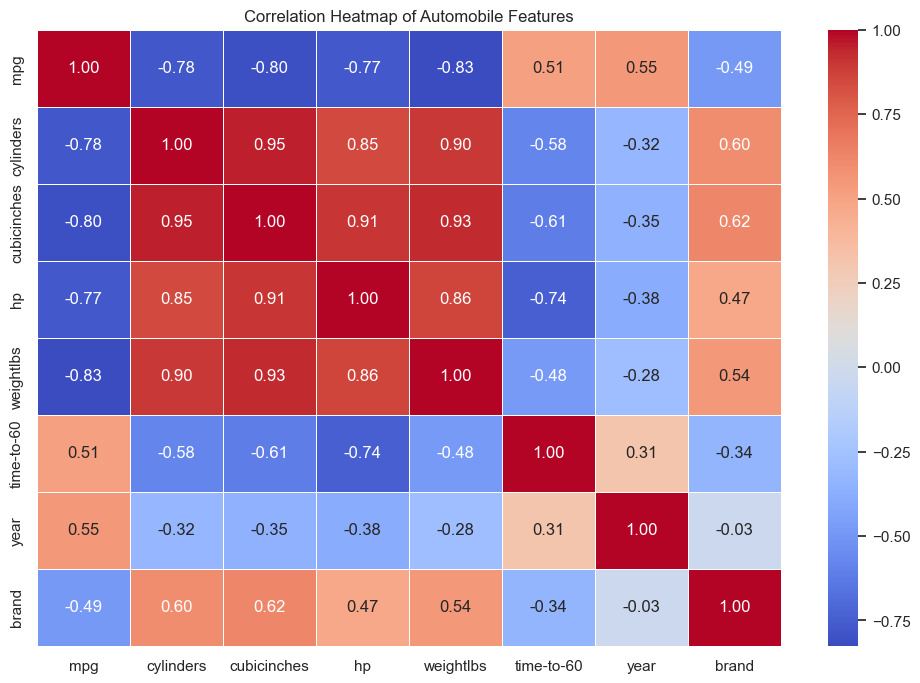

In [ ]:
# Convert 'brand' column to categorical
fandf_df['brand'] = pd.Categorical(fandf_df['brand']).codes

# Convert all columns to numeric (handle missing values)
fandf_df = fandf_df.apply(pd.to_numeric, errors='coerce')
# Compute the correlation matrix
corr_matrix = fandf_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Automobile Features')
plt.show()
